# Algorithmic Trading
- [Reference](https://towardsdatascience.com/data-science-in-algorithmic-trading-d21a46d1565d)

## Import libraries

In [0]:
import pandas as pd
import numpy as np

## Read data
- https://open.canada.ca/data/en/dataset/1bc25b1e-0e02-4a5e-afd7-7b96d6728aac

In [11]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
!pwd
os.chdir('gdrive/My Drive/Colab Notebooks')
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/My Drive/Colab Notebooks


In [15]:
# Load the CSV file
rates = pd.read_csv('10100008.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
rates.head()

,REF_DATE,GEO,DGUID,Type of currency,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1950-10-02,Canada,NaN,"United States dollar, noon spot rate",Dollars,81,units,0,v121716,1.10,1.060000,NaN,NaN,NaN,8
1,1950-10-02,Canada,NaN,"Danish krone, noon spot rate",Dollars,81,units,0,v121743,1.40,0.153459,NaN,NaN,NaN,8
2,1950-10-02,Canada,NaN,"Norwegian krone, noon spot rate",Dollars,81,units,0,v121717,1.10,0.148400,NaN,NaN,NaN,8
3,1950-10-02,Canada,NaN,"Swedish krona, noon spot rate",Dollars,81,units,0,v121718,1.11,0.204800,NaN,NaN,NaN,8
4,1950-10-02,Canada,NaN,"Swiss franc, noon spot rate",Dollars,81,units,0,v121719,1.12,0.243400,NaN,NaN,NaN,8


In [0]:
# Decide what columns we want
rates_cols=['REF_DATE', 'VALUE']

In [0]:
# Only keep the closing spot price for our currency pair
rates=rates[rates['Type of currency']=='United States dollar, closing spot rate']

In [19]:
rates.head()

,REF_DATE,GEO,DGUID,Type of currency,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
6,1950-10-02,Canada,NaN,"United States dollar, closing spot rate",Dollars,81,units,0,v121722,1.15,1.05500,NaN,NaN,NaN,8
15,1950-10-03,Canada,NaN,"United States dollar, closing spot rate",Dollars,81,units,0,v121722,1.15,1.05000,NaN,NaN,NaN,8
24,1950-10-04,Canada,NaN,"United States dollar, closing spot rate",Dollars,81,units,0,v121722,1.15,1.05250,NaN,NaN,NaN,8
33,1950-10-05,Canada,NaN,"United States dollar, closing spot rate",Dollars,81,units,0,v121722,1.15,1.06000,NaN,NaN,NaN,8
42,1950-10-06,Canada,NaN,"United States dollar, closing spot rate",Dollars,81,units,0,v121722,1.15,1.05875,NaN,NaN,NaN,8


In [0]:
# Dump the columns we don't need, and fill null values with 0s
rates=rates[rates_cols].fillna(0)

In [0]:
# Force a common index with the economic data we will be getting next
rates.index = pd.to_datetime(rates['REF_DATE'])

In [0]:
# Now that we set the index, drop the extra date column
rates.drop(['REF_DATE'], axis=1, inplace=True)

In [0]:
# Let's give our asset a nice human-friendly name: USD_CAD
rates.rename(columns={'VALUE': 'USD_CAD'}, inplace=True)

In [24]:
# If rate is on a weekend or day market is closed, then use the most recent day's rate
# Weekends are 2 days long so copy Saturday stuff to Sundays
# Carry forward the rates for 3 day and 4 day market closures
while rates[rates == 0].count(axis=0)['USD_CAD']/len(rates.index) >0:
  print("Shifting rates. Days with rate at 0 = %",rates[rates == 0].count(axis=0)['USD_CAD']/len(rates.index))
  rates['yesterday']= rates['USD_CAD'].shift(1)
  rates['USD_CAD']  = np.where(rates['USD_CAD']==0, rates['yesterday'], rates['USD_CAD'])

Shifting rates. Days with rate at 0 = % 0.31139990129955586
Shifting rates. Days with rate at 0 = % 0.16404836321763447
Shifting rates. Days with rate at 0 = % 0.020603717716729725
Shifting rates. Days with rate at 0 = % 0.0020151340681033064


In [25]:
#Verify we don't have days with rates at 0
print("Days with rate at 0 = %",rates[rates == 0].count(axis=0)['USD_CAD']/len(rates.index))

Days with rate at 0 = % 0.0


,USD_CAD
REF_DATE,
2017-04-24,1.3511
2017-04-25,1.3565
2017-04-26,1.3612
2017-04-27,1.3624
2017-04-28,1.3650


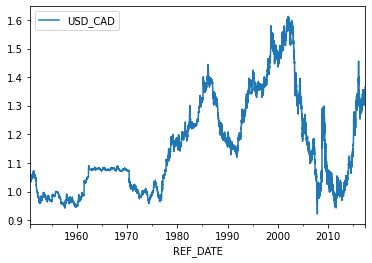

In [26]:
# Spot check the results against a trading days calendar: http://www.swingtradesystems.com/trading-days-calendars.html
# Graph the data
rates.drop(['yesterday'], axis=1, inplace=True)
rates.plot()
rates.tail()

## Industrial Product Price Index (IPPI)
- https://open.canada.ca/data/en/dataset/39a39c7c-24f1-4789-8f20-a04bcbf635b0

In [0]:
# Load the CSV file
df = pd.read_csv('18100030.csv')

In [31]:
df.head()

,REF_DATE,GEO,DGUID,North American Product Classification System (NAPCS),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1956-01,Canada,2016A000011124,"Total, Industrial product price index (IPPI)","Index, 2010=100",184,units,0,v79309137,1.1,15.6,NaN,NaN,NaN,1
1,1956-01,Canada,2016A000011124,Energy and petroleum products [P51],"Index, 2010=100",184,units,0,v79309138,1.2,NaN,..,NaN,NaN,1
2,1956-01,Canada,2016A000011124,Natural gas liquids and related products [143],"Index, 2010=100",184,units,0,v79309139,1.3,NaN,..,NaN,NaN,1
3,1956-01,Canada,2016A000011124,"Solid fuel products, not elsewhere classified ...","Index, 2010=100",184,units,0,v79309140,1.4,NaN,..,NaN,NaN,1
4,1956-01,Canada,2016A000011124,"Refined petroleum energy products, and biofuel...","Index, 2010=100",184,units,0,v79309141,1.5,NaN,..,NaN,NaN,1


In [0]:
# Decide what columns we want
categories=list(df[list(df)[3]].drop_duplicates())
df_cols=['REF_DATE', 'North American Product Classification System (NAPCS)', 'VALUE']

In [0]:
# Prepare an empty dataframe to fill with properly indexed economic data
new_df = pd.DataFrame(columns=df_cols)

In [34]:
new_df.head()

,REF_DATE,North American Product Classification System (NAPCS),VALUE


In [0]:
# Toss out the columns we don't want
df=df[df_cols]

In [0]:
# Set the date as the index using the same format as the USD_CAD data
df.index = df['REF_DATE']
new_df.index = new_df['REF_DATE']

In [0]:
# Dump out the date column now that we applied it to the dataframe index
df.drop(['REF_DATE'], axis=1, inplace=True)
new_df.drop(['REF_DATE'], axis=1, inplace=True)

In [38]:
# Spot check the dataframe so far
display(df.head())

,North American Product Classification System (NAPCS),VALUE
REF_DATE,,
1956-01,"Total, Industrial product price index (IPPI)",15.6
1956-01,Energy and petroleum products [P51],NaN
1956-01,Natural gas liquids and related products [143],NaN
1956-01,"Solid fuel products, not elsewhere classified ...",NaN
1956-01,"Refined petroleum energy products, and biofuel...",NaN


In [39]:
# Loop through the economic indicators and put each one in a dedicated column
for cat in categories:
    # Data can have problems, and not all indicators will make it through
    try:
      new_df[cat]=df[df[list(df)[0]]==cat]['VALUE']
    except Exception as e:
      print("failed on",cat,e)

failed on Asphalt (except natural) and asphalt products cannot reindex from a duplicate axis
failed on Lubricants and other petroleum refinery products cannot reindex from a duplicate axis
failed on Prepared and packaged seafood products cannot reindex from a duplicate axis
failed on Coffee and tea cannot reindex from a duplicate axis
failed on Fresh, frozen and canned fruit and vegetable juices cannot reindex from a duplicate axis
failed on Bottled water, carbonated soft drinks, other beverages, and ice cannot reindex from a duplicate axis
failed on Tobacco products cannot reindex from a duplicate axis
failed on Clothing, footwear and accessories cannot reindex from a duplicate axis
failed on Pharmaceutical and medicinal products cannot reindex from a duplicate axis
failed on Plastic resins cannot reindex from a duplicate axis
failed on Paints, coatings and adhesive products cannot reindex from a duplicate axis
failed on Waste and scrap of plastic and rubber cannot reindex from a dupl

In [40]:
# Spot check the output dataframe
display(new_df.head())

,North American Product Classification System (NAPCS),VALUE,"Total, Industrial product price index (IPPI)",Energy and petroleum products [P51],Natural gas liquids and related products [143],"Solid fuel products, not elsewhere classified [144]","Refined petroleum energy products, and biofuels [261]",Coke and other coke oven products [26111],Motor gasoline [26121],"Motor gasoline, regular","Motor gasoline, premium","Motor gasoline, midgrade",Diesel fuel [26122],Jet fuel [26131],Light fuel oils [26132],Kerosene (except jet fuel) [261321],Light fuel oils (except kerosene and diesel) [261322],Heavy fuel oils [26133],Ethanol and biodiesel fuels [26141],Ethanol fuel [261411],Biodiesel fuel [261412],Asphalt (except natural) and asphalt products [262],Asphalt (except natural) and asphalt products [26211],Asphalt (except natural) [262111],Asphalt paving mixtures and blocks [262112],Prepared asphalts (including roofing and saturated felts) [262113],Lubricants and other petroleum refinery products [264],Lubricants and other petroleum refinery products [26411],Automotive lubricating oils and greases [264111],Petroleum-based lubricating oils and greases (except automotive) [264112],Unfinished petroleum oils [264113],"Finished petroleum products, not elsewhere classified [264114]","Meat, fish, and dairy products [P11]",Prepared and packaged seafood products [171],Prepared and packaged seafood products [17111],Prepared fresh fish and shellfish and fresh seafood products [171111],"Prepared fresh fish and shellfish and fresh seafood products, domestic [171111]","Prepared fresh fish and shellfish and fresh seafood products, export [171111]",Canned fish and shellfish (including soups) [171112],"Canned fish and shellfish (including soups), domestic [171112]",...,Prefabricated wood buildings,Components for prefabricated wood buildings,Manufactured (mobile) buildings,Manufactured (mobile) homes,Non-residential mobile buildings,Miscellaneous goods and supplies,"Medical, dental and personal safety supplies","Wheelchairs, and orthopaedic and prosthetic appliances","Medical appliances and supplies, not elsewhere classified",Dental equipment and supplies,Ophthalmic products,Personal safety equipment and clothing,Signs,Caskets and coffins,"Hand tools, kitchen utensils and cutlery (except precious metal)",Hand tools,Kitchen utensils and cutlery (except precious metal),Office supplies (except paper),"Pencils, pens and markers (including parts)","Office, school and art supplies, not elsewhere classified",Batteries,Sporting and athletic goods,"Playground, gymnasium and exercise equipment",Other sporting and athletic goods,Toys and games,Infant strollers and children's vehicles,Non-electronic toys and games,Electronic toys and games (except game software),"Jewellery, cut gems, jewellery findings, and precious metal hollowware and flatware",Precious metal jewellery,Cut diamonds (except industrial),"Cut gems (except diamonds), jewellery findings, and metal coins and tokens",Precious metal hollowware and flatware,Costume jewellery and novelties,Musical instruments (including parts and accessories),Other miscellaneous goods,"Buttons, zippers and other notions","Brooms, mops, dusters, and brushes, and painting pads, rollers and accessories","Other miscellaneous goods, not elsewhere classified","Unrecorded optical and magnetic media, and media not elsewhere classified"
REF_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1956-01,NaN,NaN,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,NaN,NaN,5.1,4.5,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1956-02,NaN,NaN,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,NaN,NaN,5.1,4.5,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,

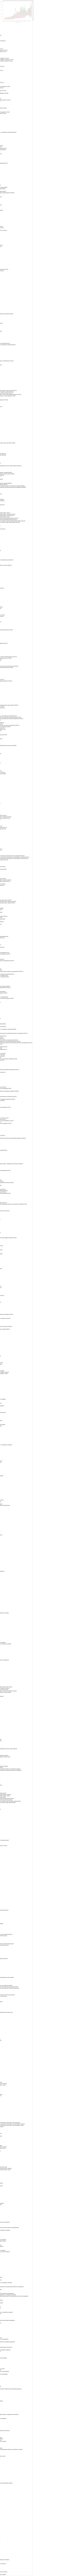

In [41]:
# Graph the data
new_df.plot()

In [0]:
# Save the dataframe with the economic indicators to a file
new_df.to_csv("forex_signals.csv")

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [0]:
def makeFig(plt, title, xlabel, ylabel, fName):
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.tight_layout()
  plt.savefig(fName, dpi=100)
  #plt.show()
  return

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All

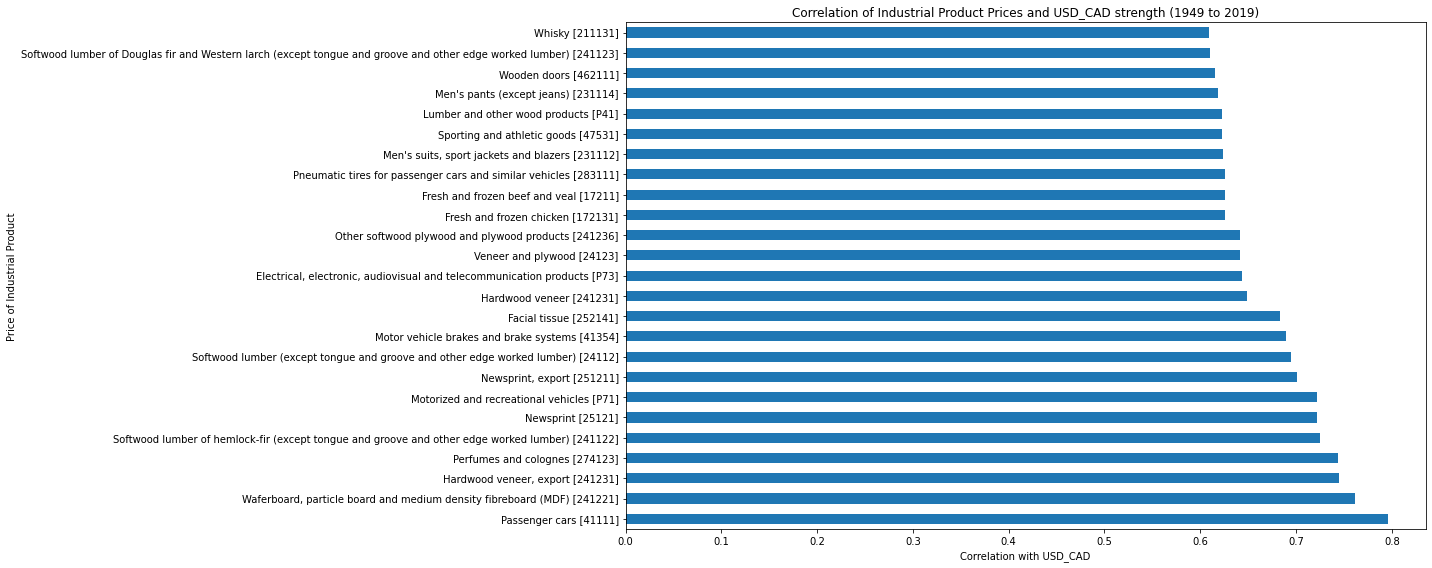

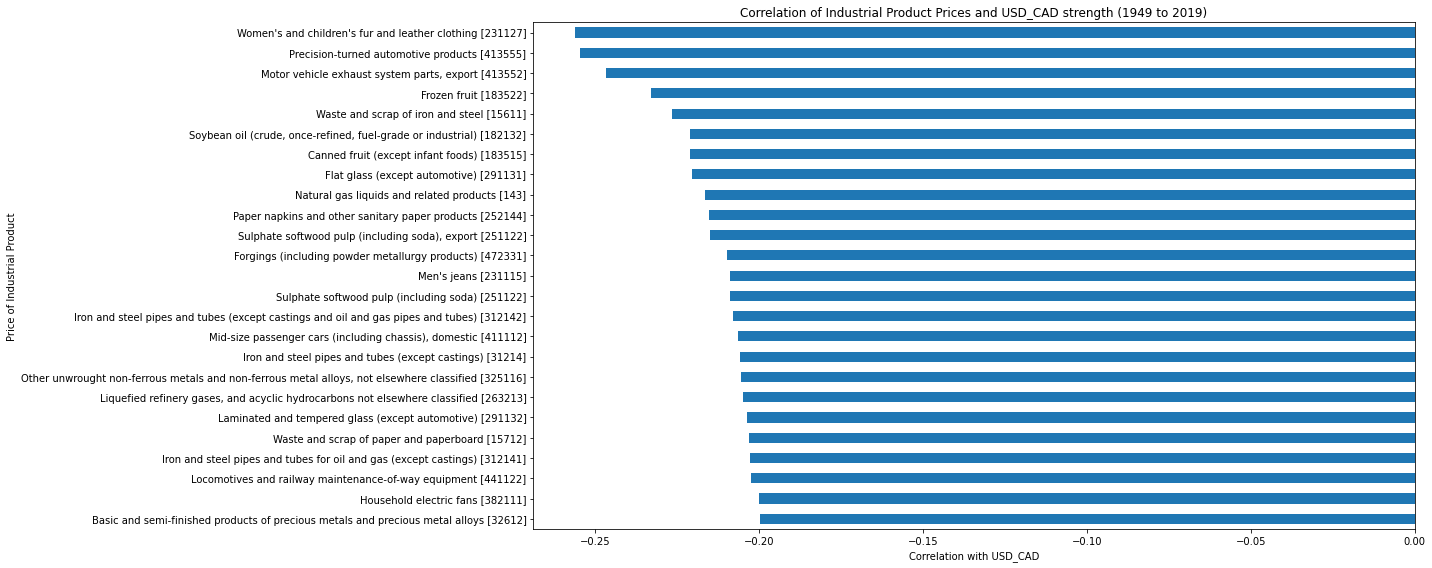

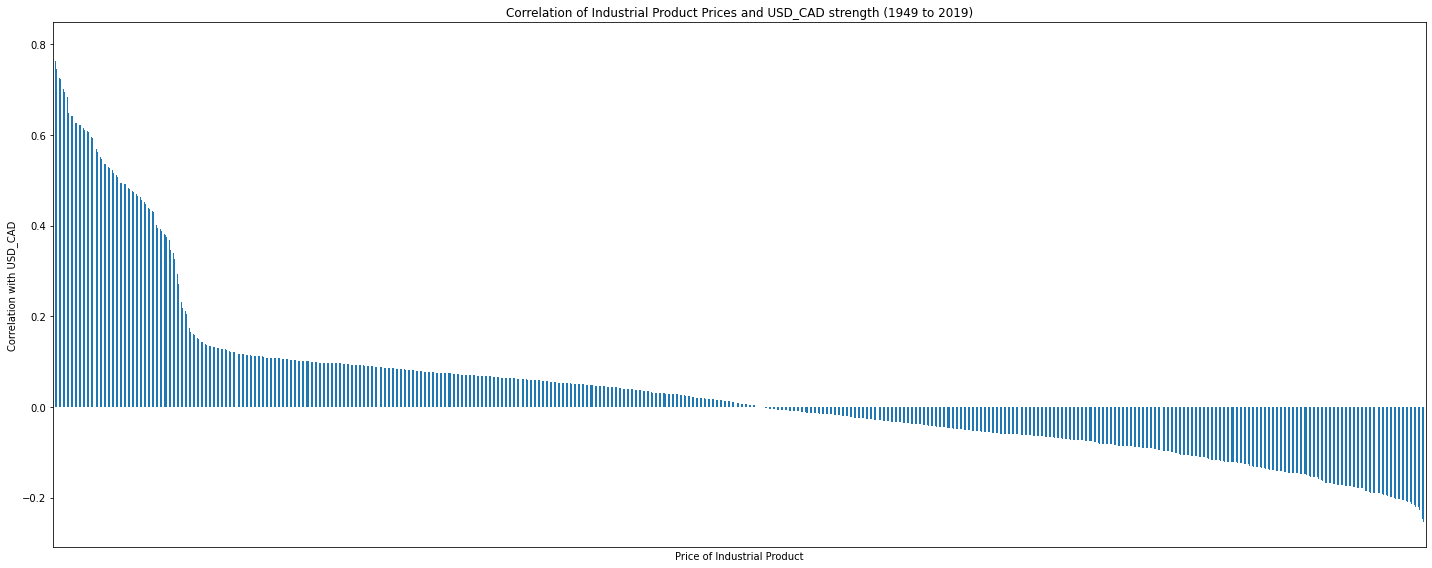

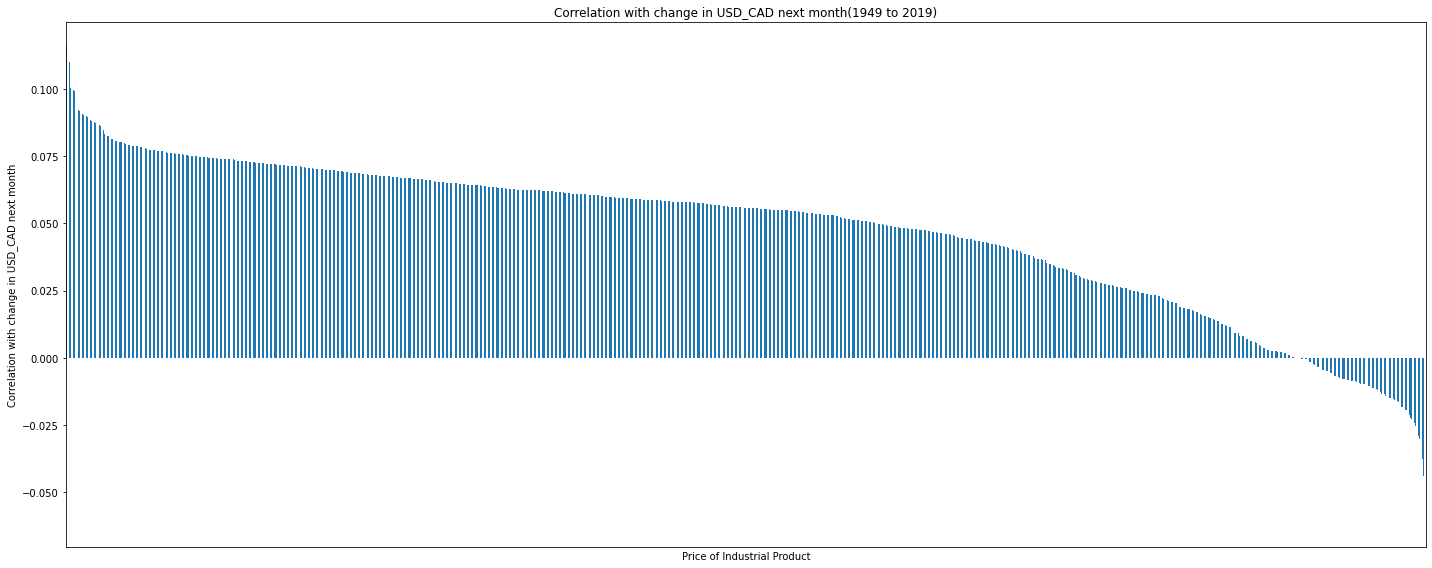

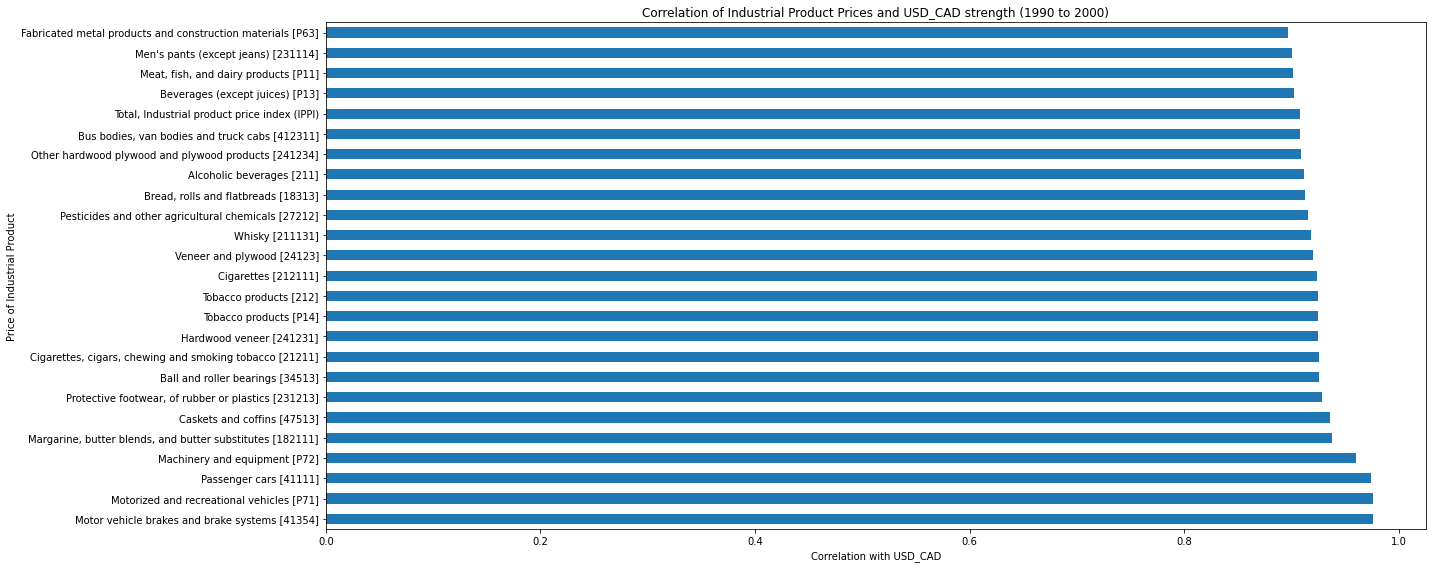

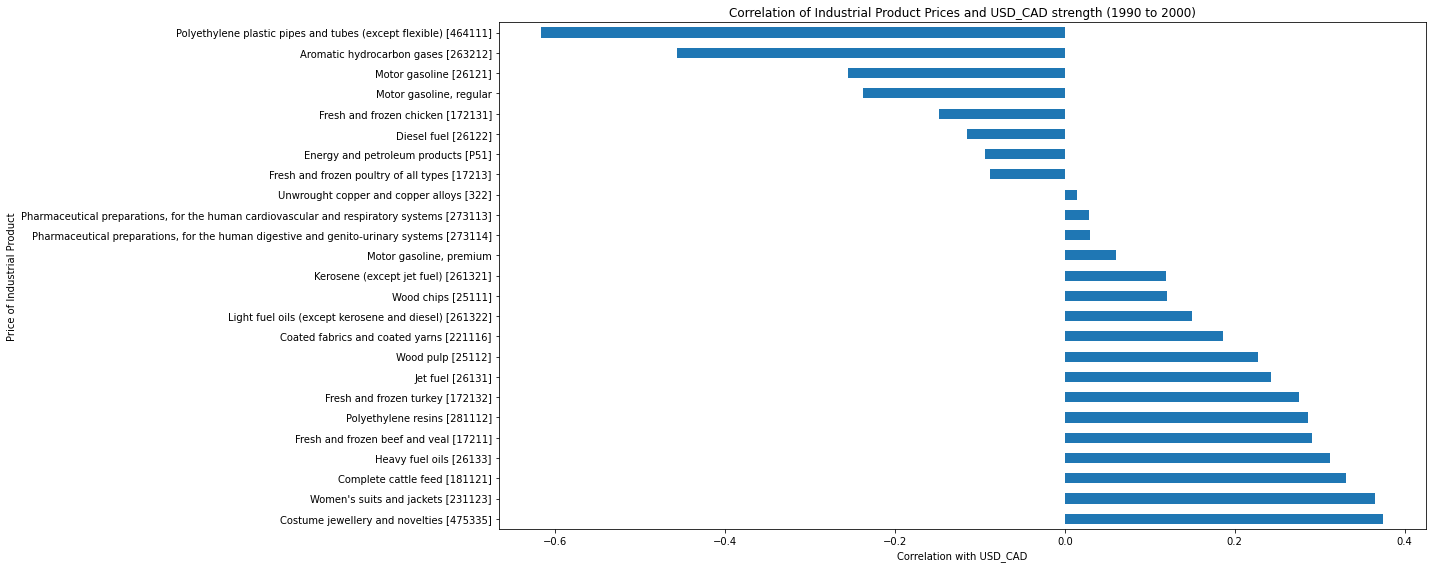

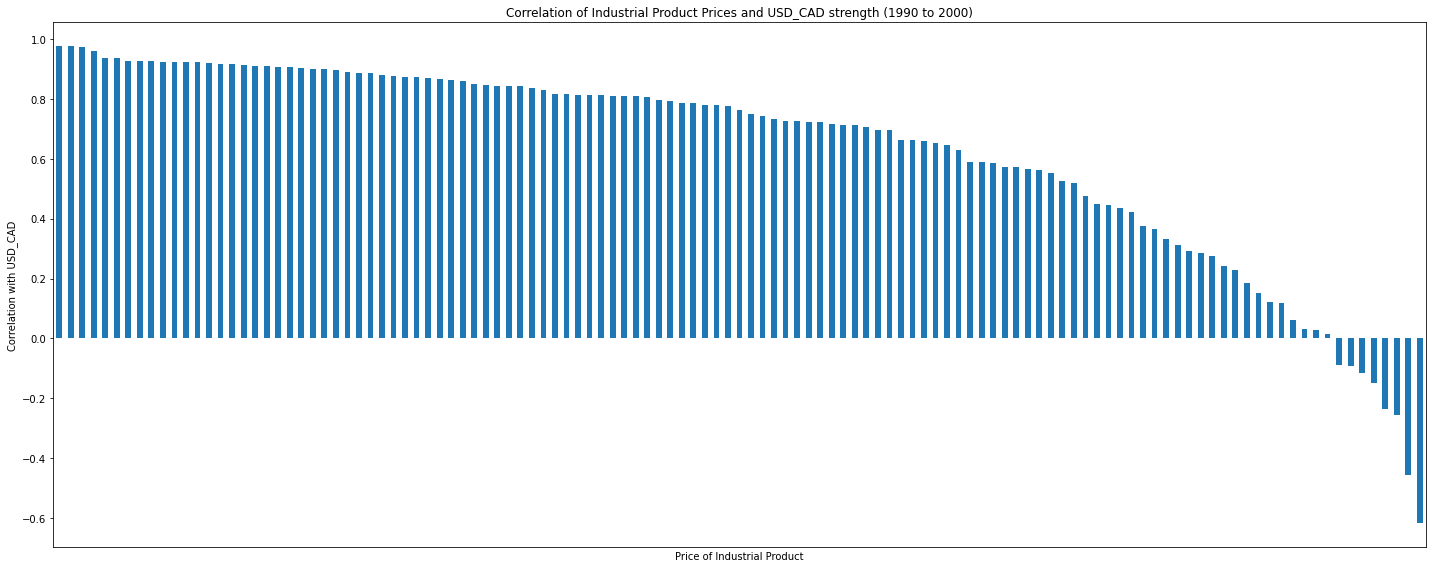

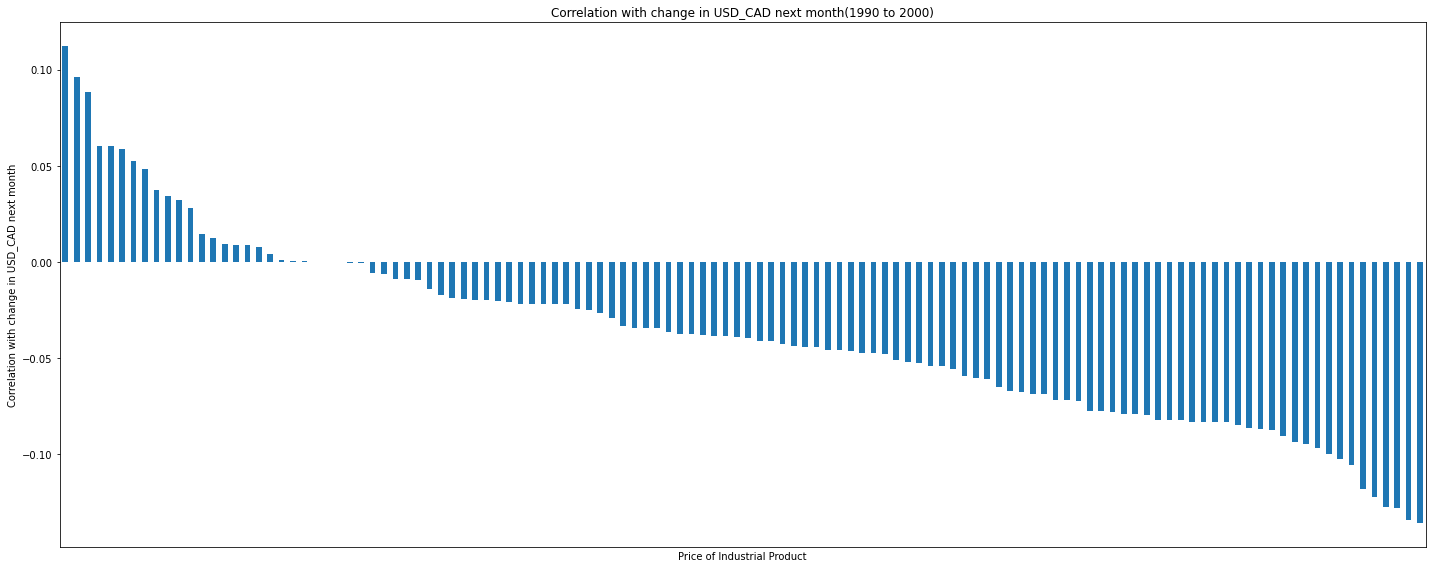

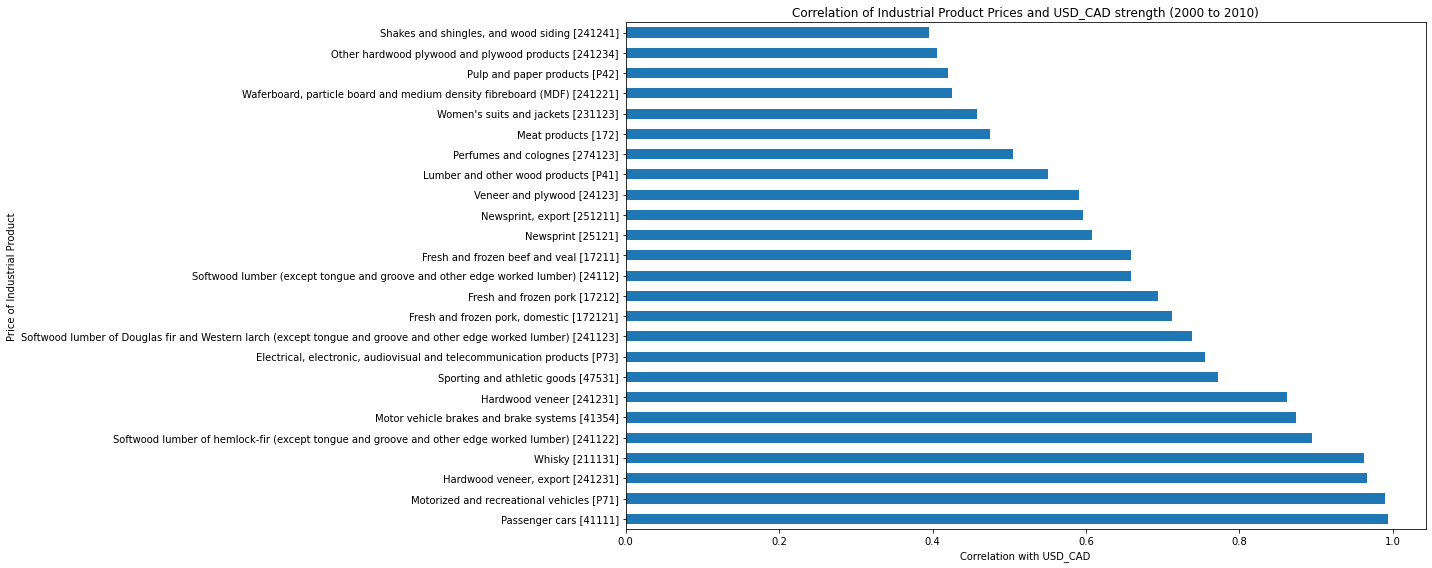

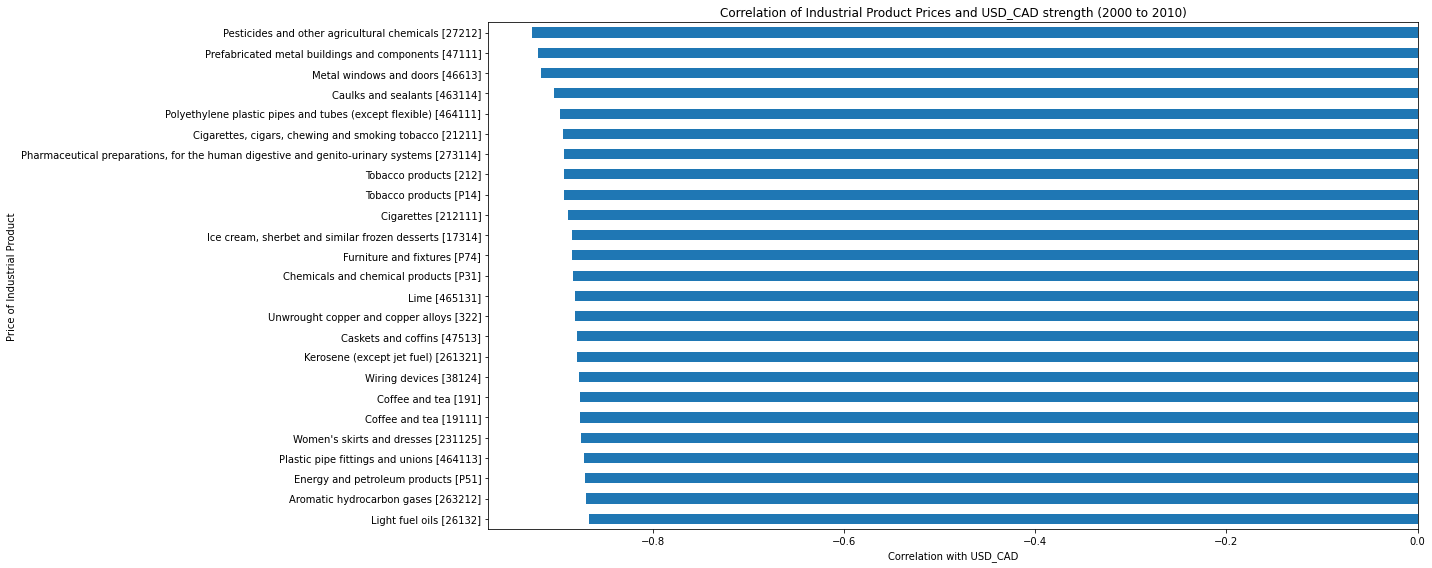

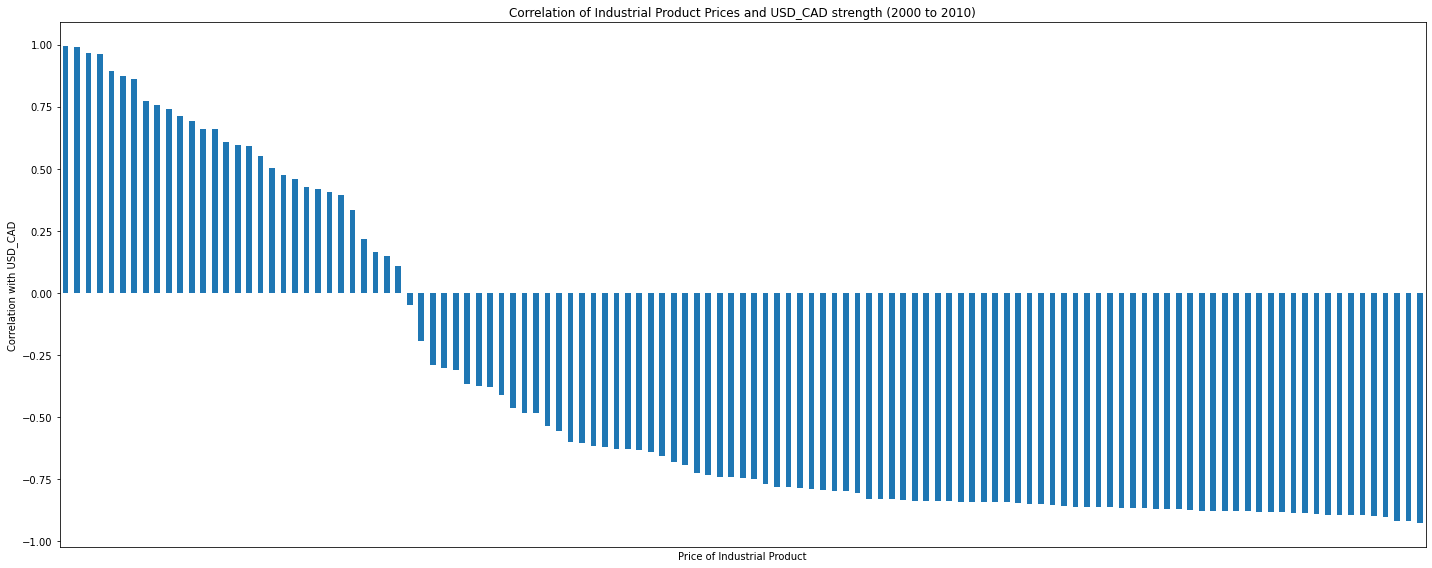

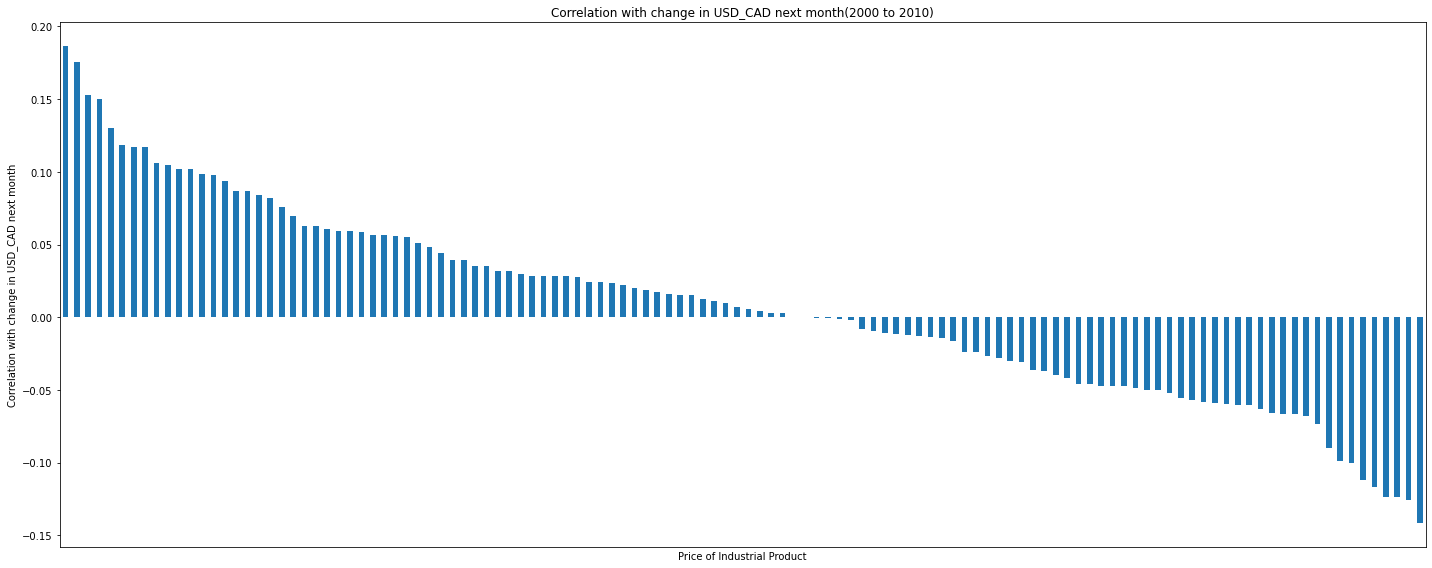

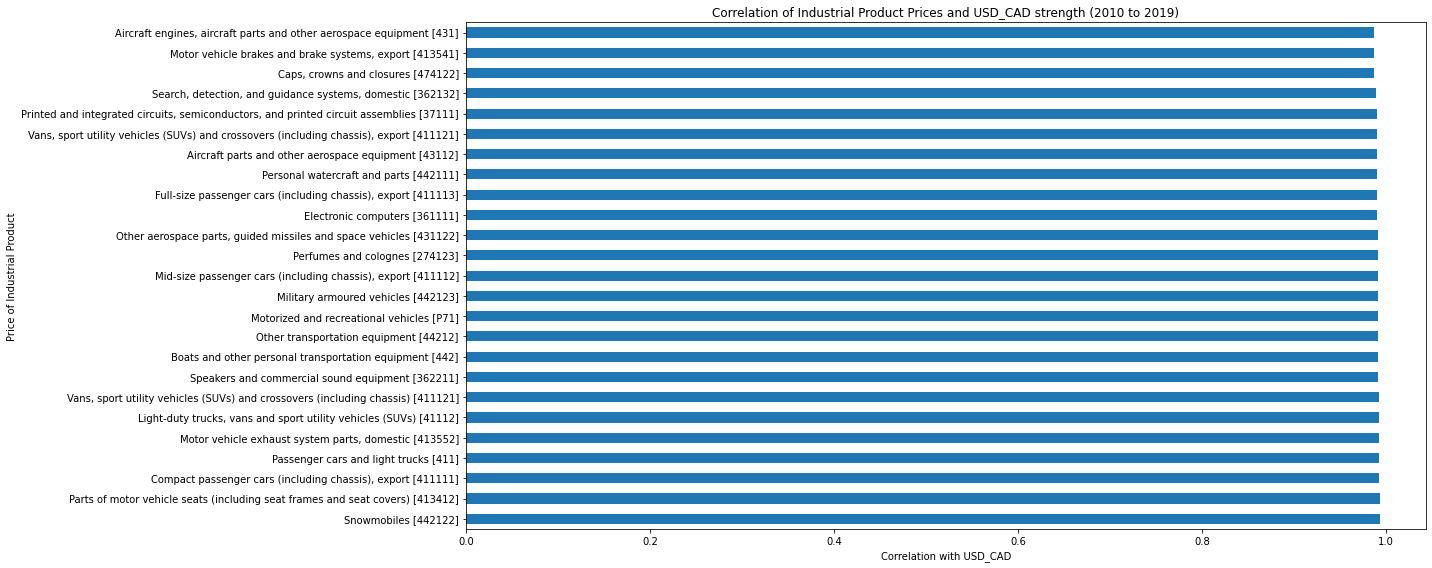

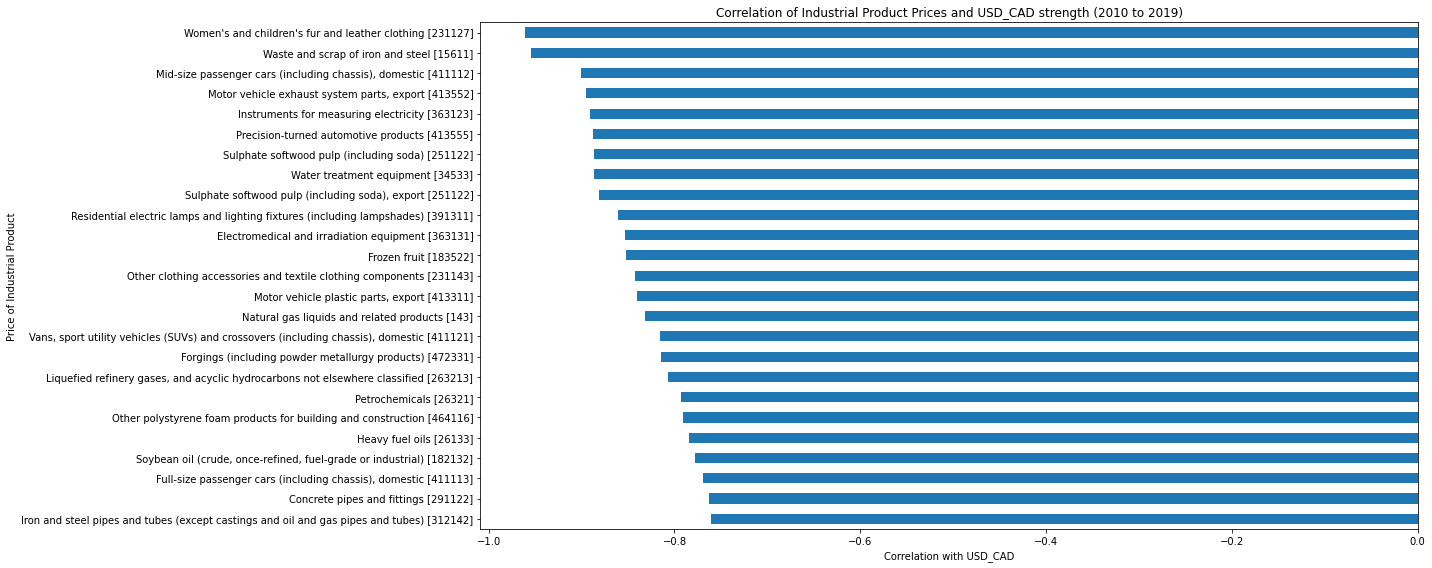

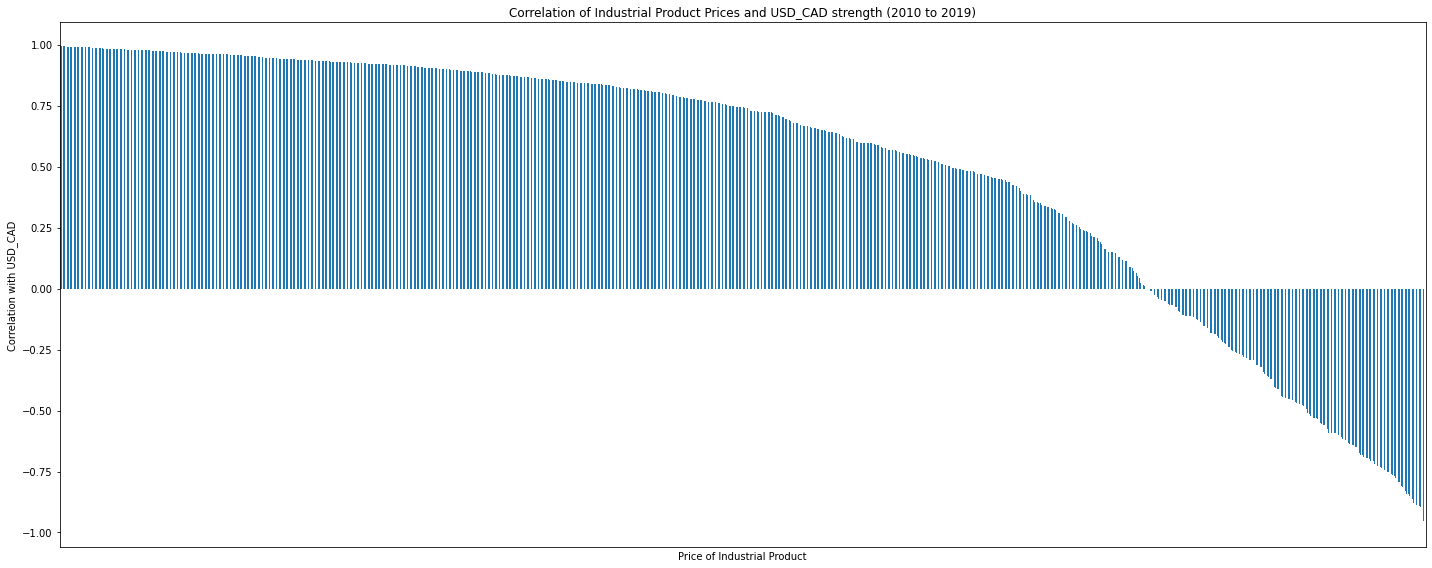

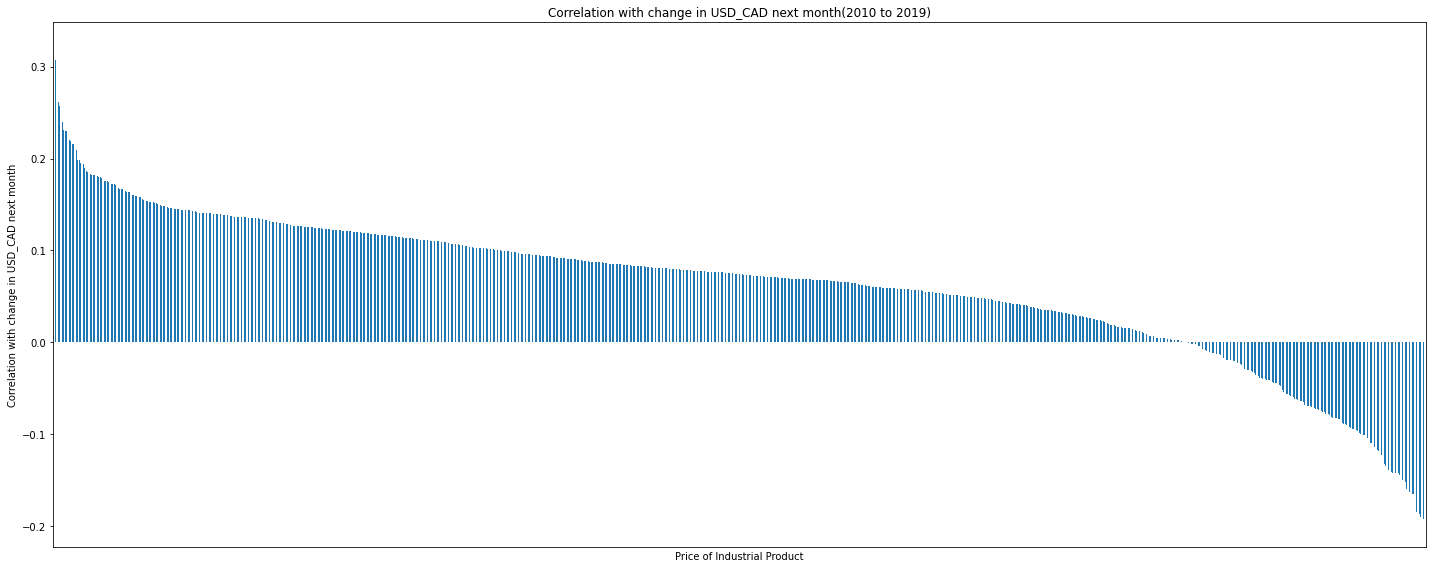

In [47]:
# Observe the whole data range and then specific data ranges
for startYear,endYear in [[1949,2019],[1990,2000],[2000,2010],[2010,2019]]:
  df_new = pd.read_csv('forex_signals.csv',index_col=0)
  # Keep only the data for the time range that we care about
  if startYear>=1950:
    df_new = df_new[df_new.index>=str(startYear)+'-01']
    df_new = df_new[df_new.index<str(endYear)+'-01']
  # Use the same date format we used for the exchange rate
  df_new.index=pd.to_datetime(df_new.index)

  #df_new.plot(legend=False)

  # Scale the IPPI data
  scaler = MinMaxScaler()
  df_new[list(df_new)] = scaler.fit_transform(df_new[list(df_new)])
  # Join the exchange rate data with the IPPI data
  m=df_new[list(df_new)[:]].join(rates, how='inner').fillna(0)

  correlations = m.corr()['USD_CAD'].sort_values(ascending=False).dropna()
  
  plt.figure(figsize=(20, 8))
  correlations[1:26].plot.barh()
  title="Correlation of Industrial Product Prices and USD_CAD strength ("+str(startYear)+" to "+str(endYear)+")"
  xlabel="Correlation with USD_CAD"
  ylabel="Price of Industrial Product"
  fName=str(startYear)+'s_corr_high.png'
  makeFig(plt, title, xlabel, ylabel, fName)
  
  plt.figure(figsize=(20, 8))
  correlations[-25:].plot.barh()
  fName=str(startYear)+'s_corr_low.png'
  makeFig(plt, title, xlabel, ylabel, fName)
  
  plt.figure(figsize=(20, 8))
  correlations[1:].plot.bar()
  plt.xticks([])  
  fName=str(startYear)+'s_histogram_correlations.png'
  makeFig(plt, title, ylabel, xlabel, fName)
  
  # Tomorrow minus today's exchange rate gives the rate delta
  # Intuition: When tomorrow's USD_CAD exchange rate is higher than today's, the result is positive
  p=m.copy(deep=True)
  p['dUSD_CAD']= m['USD_CAD'].shift(-1) - m['USD_CAD']
  causations = p.corr()['dUSD_CAD'].sort_values(ascending=False).dropna()
  
  plt.figure(figsize=(20, 8))
  causations[1:].plot.bar()
  plt.xticks([])
  xlabel="Price of Industrial Product"
  ylabel="Correlation with change in USD_CAD next month"
  title="Correlation with change in USD_CAD next month("+str(startYear)+" to "+str(endYear)+")"
  fName=str(startYear)+'s_histogram_predictions.png'
  makeFig(plt, title, xlabel, ylabel, fName)